# Telecom X - Análise de Evasão de Clientes


---



A empresa ***Telecom X*** enfrenta um alto índice de
cancelamentos e precisa entender os fatores que levam à perda de clientes.

O desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da análise, os demais colegas da  equipe de Data Science poderão avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

***Nesta Challenge será trabalhado:***





*   ✅ Importar e manipular dados de uma API de forma eficiente.
*   ✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
*   ✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.
*   ✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

***Vamos lá !!!*** 🚀

#📌 Extracão


---



Para iniciar análise, importei os dados da API da Telecom X. Esses dados estão disponíveis no formato `JSON` e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

In [ ]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

: 

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
dados = pd.read_json(url)  # Atribui á uma variável os dados importados
dados.head()  # Visualizar os dados

#🔧 Transformação


---



Após a extração dos dados, é fundamental entender a estrutura do dataset e o significado de suas colunas. 

## Normalizando dados

In [ ]:
dados = requests.get(url)
resultado = json.loads(dados.text)

dados = pd.json_normalize(resultado, sep='/')
dados.head()

## 🎯 Traduzindo as colunas para melhor análise de dados.

In [ ]:
dados.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer/gender': 'Gênero',
    'customer/SeniorCitizen': 'Idoso',
    'customer/Partner': 'Possui_Companheiro',
    'customer/Dependents': 'Possui_Dependentes',
    'customer/tenure': 'Meses_de_Contrato',
    'phone/PhoneService': 'Telefone_Ativo',
    'phone/MultipleLines': 'Multiplas_Linhas',
    'internet/InternetService': 'Tipo_Internet',
    'internet/OnlineSecurity': 'Seguranca_Online',
    'internet/OnlineBackup': 'Backup_Online',
    'internet/DeviceProtection': 'Protecao_Dispositivo',
    'internet/TechSupport': 'Suporte_Tecnico',
    'internet/StreamingTV': 'Streaming_TV',
    'internet/StreamingMovies': 'Streaming_Filmes',
    'account/Contract': 'Tipo_Contrato',
    'account/PaperlessBilling': 'Fatura_Digital',
    'account/PaymentMethod': 'Forma_Pagamento',
    'account/Charges/Monthly': 'Valor_Mensal',
    'account/Charges/Total': 'Valor_Total',
    'tempo_estimado_meses': 'Meses_Estimados',
    'Conta_Diarias': 'Conta_Diaria'
}, inplace=True)

dados.head()

## 🔎 Identifica quantidade de Linhas e Colunas do DataFrame.

In [ ]:
linhas, colunas = dados.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")

## 🔎 Verificando Inconsistências nos Dados

In [ ]:
# Mostra o resumo das colunas e tipos.
dados.info()

🔍  Padronizando valores e a formatação;

🔍  Identificando cada coluna com o tipo correto dos seus valores.

In [ ]:
colunas_para_formatar = []

# Padroniza strings: tira espaços e coloca só a primeira letra maiúscula
for col in colunas_para_formatar:
    if dados[col].dtype == 'object':
        dados[col] = dados[col].str.strip().str.capitalize()

# Converte a coluna numérica
dados['Valor_Total'] = pd.to_numeric(dados['Valor_Total'], errors='coerce')

dados.info()


🔍  VERIFICANDO  E TRATANDO OS VALORES NULOS

In [ ]:
# Verificar valores nulos:
print("VALORES NULOS:\n--------------\n")
print(dados.isnull().sum())

In [ ]:
# Excluindo todos os valores nulos:
dados = dados.dropna()

🔍  VERIFICANDO E TRATANDO STRINGS VAZIAS

In [ ]:
# Verifica se há strings vazias em cada coluna
print("STRINGS VAZIAS:\n---------------\n")
print((dados == '').sum())

In [ ]:
# Substituindo apenas trings vazia da coluna 'Churn' por 'Não informado':
dados['Cancelamento'] = dados['Cancelamento'].replace('', 'Não informado')

In [ ]:
# Listando os valores únicos da coluna "Churn", onde substituimos valor nulo por 'Não informado':
dados['Cancelamento'].unique()

## 🎯 Coluna de Contas Diárias

Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilizei o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

📌 Essa coluna ajudará a aprofundar sua análise e fornecer informações valiosas para as próximas etapas.

In [ ]:
# Criar uma coluna com tempo estimado em meses
dados['tempo_estimado_meses'] = dados['Valor_Total'] / dados['Valor_Mensal']

# Criar a coluna Conta_Diarias
dados['Conta_Diarias'] = (dados['Valor_Total'] / dados['tempo_estimado_meses']) / 30

dados.head()

#📊 Carga e Análise

Análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [ ]:
dados[['Meses_de_Contrato', 'Valor_Mensal', 'Valor_Total', 'Conta_Diarias']].describe().T

## 🔎 EVASÃO DE CLIENTES na TOTALIDADE:

In [ ]:
# Substituir os valores de churn para rótulos desejados
dados_churn = dados['Cancelamento'].replace({
    'Yes': 'Sim',
    'No': 'Não',
    '': 'Não informado'
})

# Contagem dos valores
contagem = dados_churn.value_counts()
labels = contagem.index
sizes = contagem.values

# Cores de acordo com os labels atuais
cor_mapa = {
    'Não': '#b2df8a',           # verde pastel → Ativo
    'Sim': '#fcbfdc',           # rosa pastel → Inativo
    'Não informado': '#a1c9f4'  # azul pastel
}
colors = [cor_mapa[label] for label in labels]

# Explode apenas para 'Sim' (Inativo)
explode = [0.03 if label == 'Sim' else 0 for label in labels]

# Gráfico
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    colors=colors,
    shadow=True,
    textprops=dict(color="black", fontsize=9)
)

# Inserir os nomes no centro das fatias
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{labels[i]}\n{autotext.get_text()}')

# Título e layout
plt.title('Evasão de Clientes', fontsize=14)
plt.axis('equal')
plt.show()


: 

## 🔎 EVASÃO DE CLIENTES por CATEGORIAS:

In [ ]:
# Lista de colunas categóricas
variaveis_categoricas = [
    'Gênero',
    'Idoso',
    'Possui_Companheiro',
    'Possui_Dependentes',
    'Meses_de_Contrato',
    'Telefone_Ativo',
    'Multiplas_Linhas',
    'Tipo_Internet',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Digital',
    'Forma_Pagamento',
    'Valor_Mensal',
]

# Paleta de cores personalizada
paleta_churn = {
    'No': '#b2df8a',
    'Yes': '#fcbfdc',
    'Não informado': '#a1c9f4'
}

# Criar subplots com 3 colunas
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 70))
axes = axes.flatten()  # transforma a matriz 10x2 em uma lista simples de eixos

# Gerar os gráficos
for i, coluna in enumerate(variaveis_categoricas):
    sns.countplot(data=dados, x=coluna, hue='Cancelamento', palette=paleta_churn, ax=axes[i])
    axes[i].set_title(f'Evasão por {coluna}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(title='Situação')

# Esconde eixos vazios (se sobrar algum)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 🔎 EVASÃO DE CLIENTES por VARIÁVEIS NUMÉRICAS:

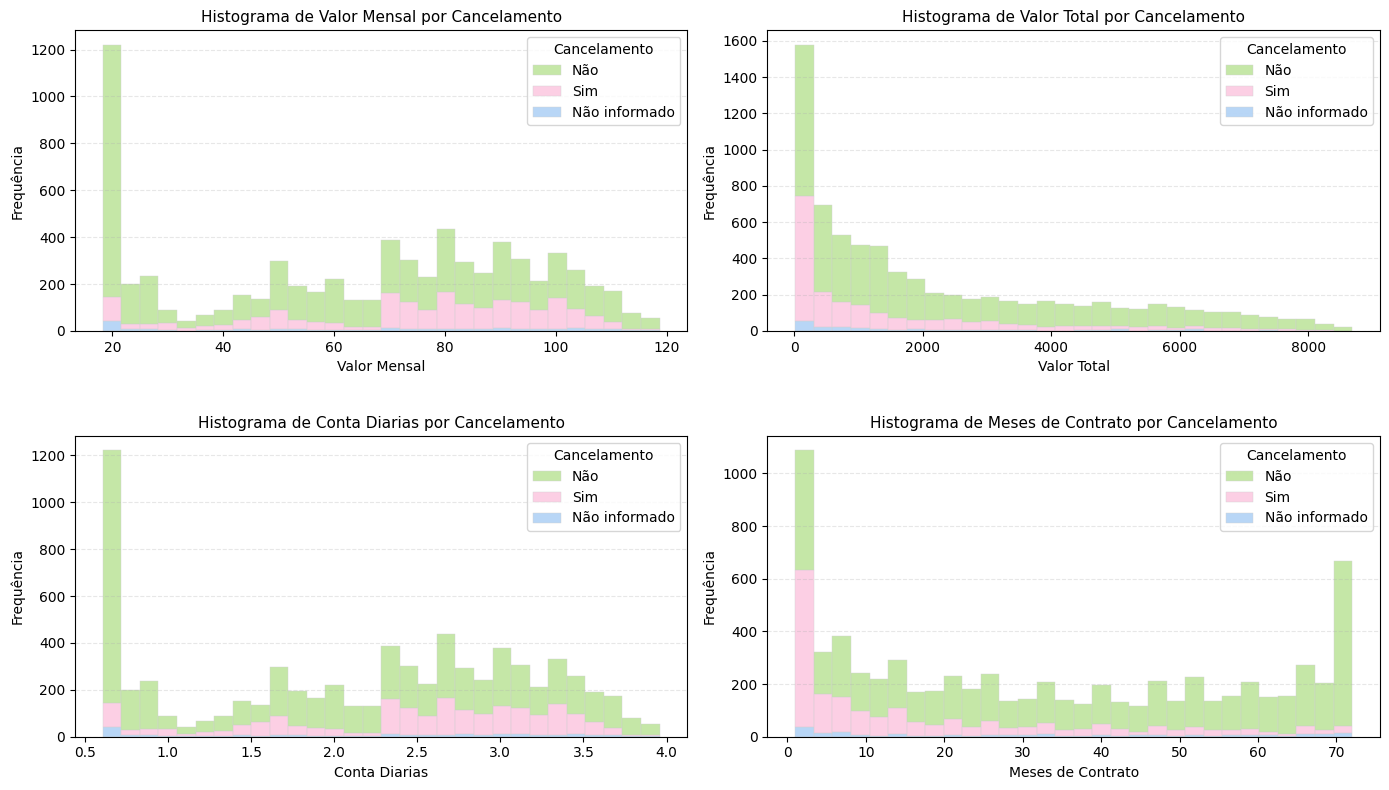

In [ ]:
# Paleta de cores personalizada
paleta = {
    'Yes': '#fcbfdc',            # rosa claro
    'No': '#b2df8a',            # verde claro
    'Não informado': '#a1c9f4'   # azul pastel
}

# Lista de variáveis numéricas
variaveis_numericas = ['Valor_Mensal', 'Valor_Total', 'Conta_Diarias', 'Meses_de_Contrato']

# Criar subplots - 2 colunas
n = len(variaveis_numericas)
ncols = 2
nrows = (n + 1) // ncols  # garante linhas suficientes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Plotar os gráficos
for i, var in enumerate(variaveis_numericas):
    sns.histplot(
        data=dados,
        x=var,
        hue='Cancelamento',
        multiple='stack',
        palette=paleta,
        bins=30,
        edgecolor='lightgray',
        linewidth=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f'Histograma de {var.replace("_", " ")} por Cancelamento', fontsize=11)
    axes[i].set_xlabel(var.replace('_', ' '))
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Esconde gráficos vazios, se sobrar espaço
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para espaçamento entre os gráficos
plt.tight_layout(h_pad=3.0)  # h_pad ajusta o espaçamento vertical entre linhas
plt.show()

#**🚀 Extra**: Análise de Correlação entre Variáveis

Como um passo adicional, explorei a correlação entre diferentes variáveis do ***dataset***. Isso pode ajudar a identificar quais fatores têm maior relação com a evasão de clientes.


In [ ]:
# Criar cópia dos dados para análise
dados_corr = dados.copy()

# Transformar a variável 'Cancelamento' para numérica (Sim=1, Não=0)
dados_corr['Cancelamento_Num'] = dados_corr['Cancelamento'].replace({'Yes': 1, 'No': 0, 'Não informado':0})

# Selecionar apenas variáveis numéricas
variaveis_numericas = ['Conta_Diarias', 'Valor_Mensal', 'Valor_Total', 'Meses_de_Contrato']
variaveis_numericas.append('Cancelamento_Num')

# Calcular matriz de correlação
matriz_corr = dados_corr[variaveis_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas\n', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



: 

<ipython-input-74-2859891151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelamento', y='Conta_Diarias', data=dados, palette={'Sim': '#fcbfdc', 'Não': '#b2df8a', 'Não informado': '#a1c9f4'})


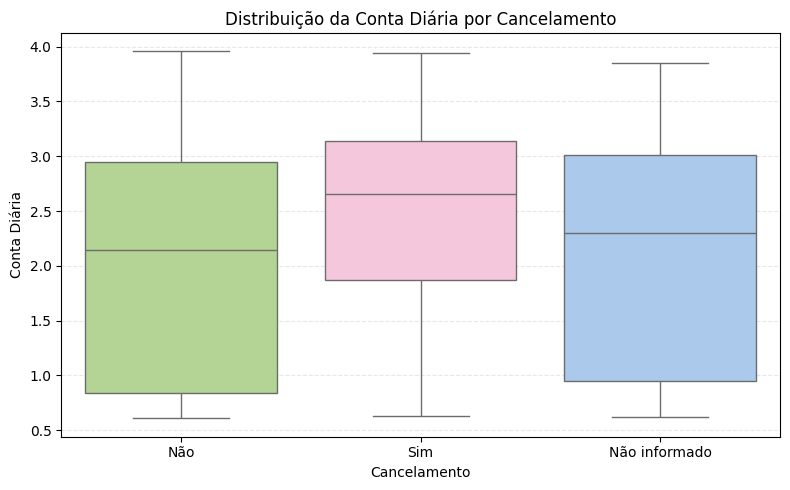

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelamento', y='Conta_Diarias', data=dados, palette={'Yes': '#fcbfdc', 'No': '#b2df8a', 'Não informado': '#a1c9f4'})
plt.title('Distribuição da Conta Diária por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Conta Diária')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
dados.to_csv("dados_tratados.csv", index=False)

: 

#📊 Relatório Final – Análise de Evasão de Clientes da Telecom X

## 🧾 Introdução

A Telecom X enfrenta um **alto índice de cancelamentos de clientes**. Para melhorar a retenção, é necessário compreender os fatores que influenciam esse comportamento de evasão, conhecido como **churn**.

Este projeto teve como objetivo analisar os dados de clientes da empresa para **identificar padrões e possíveis causas de cancelamento**, com foco em variáveis demográficas, contratuais e de consumo.

## 🧹 Limpeza e Tratamento de Dados

Foram seguidos os seguintes passos para preparar os dados:

* 📥 **Importação de dados JSON**.
* 🔍 **Normalização de colunas aninhadas**.
* 🌎 **Tradução** para melhor compreensão dos analistas brasileiros.
* ❌ **Remoção de registros com valores ausentes**.
* 🌐 **Padronização de nomes de colunas**.
* 🧩 **Criação da variável derivada `Conta_Diarias`**, com base no gasto mensal.

## 🔎 Análise Exploratória de Dados (EDA)

A seguir, apresentamos os principais resultados exploratórios, divididos em categorias:


### 🎯 Distribuição Geral do Cancelamento

* **Cerca de 25,8% dos clientes cancelaram** seus serviços.
* Gráfico de **pizza** evidencia o problema de retenção.

### 📋 Cancelamento por Variáveis Categóricas

Foi analisada a evasão por variáveis e encontrado:

* Clientes com **contrato mensal** têm **alta taxa de cancelamento**.
* Formas de pagamento como **"Electronic Check"** e  o tipo de internet **'Fiber Optic'** estão mais associadas à evasão.
* Clientes que **não possuem serviços extras** tendem a sair com mais frequência.

### 📈 Cancelamento por Variáveis Numéricas

Foram analisadas variáveis e observado:

* **Clientes recém-chegados** apresentam cancelamento elevado.
* **Cancelamento mais comum** esta na faixa de valor entre $70,00 e $100,00.


## 💡 Conclusões e Insights

* A análise do cancelamento revela padrões importantes sobre os clientes que cancelam seus serviços. Observamos que a evasão é predominantemente registrada entre usuários que possuem pouco tempo de permanência na empresa, indicando uma tendência de desistência precoce.

* Além disso, a cobrança via electronic check também se destaca como um fator associado ao cancelamento, possivelmente devido à praticidade limitada desse método de pagamento.

* Clientes que pagam mais por mês e não utilizam serviços adicionais estão mais propensos a cancelar, reforçando a importância de agregar valor à experiência do cliente.

## ✅ Recomendações

Com base nesses insights, recomenda-se que a Telecom X adote estratégias para minimizar a evasão e fortalecer a retenção de clientes:
1. **Incentivar contratos de longo prazo:** Criar programas de fidelidade, oferecer descontos progressivos ou benefícios exclusivos para clientes que optam por assinaturas anuais.
2. **Ampliar o valor dos serviços adicionais:** Estimular a adesão a pacotes como suporte técnico premium, segurança online ou benefícios exclusivos para quem utiliza mais serviços da empresa.
3. **Revisar métodos de pagamento:** Reduzir a dependência do electronic check, promovendo opções mais convenientes como débito automático, cartão de crédito ou PIX, para facilitar transações e reduzir cancelamentos.
4. **Aprimorar o suporte nos primeiros meses:** Implementar uma jornada de boas-vindas personalizada, com contato proativo, ofertas especiais e suporte dedicado para os novos clientes.
